*Eduardus Tjitrahardja | @edutjie | 2022*

# Neural Network

## Importing Libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pprint

from random import random, seed; seed(90)

## Defining Neural Network

In [2]:
def init_neural_network(num_inputs, num_hidden, num_outputs):
    network = list()

    hidden_layer = [{"weights": [random() for i in range(num_inputs + 1)]} for i in range(num_hidden)] # +1 for bias
    network.append(hidden_layer)

    output_layer = [{"weights": [random() for i in range(num_hidden + 1)]} for i in range(num_outputs)] # +1 for bias
    network.append(output_layer)

    return network

## Creating Instance

In [3]:
network = init_neural_network(2, 2, 2)
network

[[{'weights': [0.20367044742105156, 0.09269342184833151, 0.6594800023332608]},
  {'weights': [0.5861294218137865, 0.6344092107298325, 0.35484694544207973]}],
 [{'weights': [0.45126484018795465, 0.8883693290473246, 0.817919070323204]},
  {'weights': [0.26472725338019576,
    0.27283011652347666,
    0.07427986373631945]}]]

## Forward Propagation

In [4]:
def activate(weights, inputs):
    activation = weights[-1] # bias
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [5]:
# activation function: sigmoid
def transfer(activation):
    return 1.0 / (1.0 + math.exp(-activation))

## Forward Process

In [6]:
def forward_propagate(network, feature):
    inputs = feature
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron["weights"], inputs)
            neuron["output"] = transfer(activation)
            new_inputs.append(neuron["output"])
        inputs = new_inputs
    return inputs

In [7]:
features = [0.98, 0.1]
forward_propagate(network, features)

[0.85618547666896, 0.6129706215431857]

## Back Propogration

In [8]:
def transfer_derivative(output):
    return output * (1.0 - output)

In [9]:
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        
        # error for output layer
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron["weights"][j] * neuron["delta"])
                errors.append(error)
        # error for hidden layer
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron["output"])
                
        # calculate delta for each neuron
        for j in range(len(layer)):
            neuron = layer[j]
            neuron["delta"] = errors[j] * transfer_derivative(neuron["output"])

## Updating Weight

In [20]:
def update_weights(network, feature, lr):
    for i in range(len(network)):
        inputs = feature if i == 0 else [neuron["output"] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron["weights"][j] += lr * neuron["delta"] * inputs[j]
            neuron["weights"][-1] += lr * neuron["delta"]

## Training Weight

In [19]:
def calculate_sum_squared_error(outputs, labels):
    
    error = sum([(labels[i] - outputs[i])**2 for i in range(len(labels))])
    return error

In [23]:
def train_network(network, data, num_outputs, learning_rate, num_epochs):
    
    total_loss = []
    print_every = 4
    
    for epoch in range(1, num_epochs+1):
        
        sum_error = 0.0
        
        for features in data:
            
            # forward propagation
            outputs = forward_propagate(network, features)
            labels = [0 for _ in range(num_outputs)]
            labels[features[-1]] = 1
            sum_error += calculate_sum_squared_error(outputs, labels)
            
            # backward propagation
            backward_propagate_error(network, labels)
            
            # optimize weights
            update_weights(network, features, learning_rate)
        
        if epoch % print_every == 0:
            print(f'Epoch: {epoch}, Learning rate: {learning_rate:.3f}, Loss: {sum_error:.3f}')
        
        total_loss.append(sum_error)
        
    # removes all delta and outputs calculations
    for layer in network: 
        for neuron in layer: del neuron['output']; del neuron['delta']
            
    return total_loss

## Running Network

In [12]:
def plot_network(total_loss):
    plt.plot(total_loss)
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

In [13]:
# refers to http://archive.ics.uci.edu/ml/datasets/seeds for the original datasets
datasets = [[2.7810836, 2.550537003, 0], 
            [1.465489372, 2.362125076, 0], 
            [3.396561688, 4.400293529, 0], 
            [1.38807019, 1.850220317, 0], 
            [3.06407232, 3.005305973, 0], 
            [7.627531214, 2.759262235, 1], 
            [5.332441248, 2.088626775, 1], 
            [6.922596716, 1.77106367, 1], 
            [8.675418651, -0.242068655, 1], 
            [7.673756466, 3.508563011, 1]]

In [14]:
num_inputs = len(datasets[0]) - 1 # ignore the labels or class
num_outputs = len(set([features[-1] for features in datasets]))

In [15]:
network = init_neural_network(num_inputs=num_inputs, num_hidden=2, num_outputs=num_outputs)

Epoch: 4, Learning rate: 0.400, Loss: 0.256
Epoch: 8, Learning rate: 0.400, Loss: 0.235
Epoch: 12, Learning rate: 0.400, Loss: 0.216
Epoch: 16, Learning rate: 0.400, Loss: 0.200
Epoch: 20, Learning rate: 0.400, Loss: 0.186
Epoch: 24, Learning rate: 0.400, Loss: 0.174
Epoch: 28, Learning rate: 0.400, Loss: 0.163
Epoch: 32, Learning rate: 0.400, Loss: 0.153
Epoch: 36, Learning rate: 0.400, Loss: 0.144
Epoch: 40, Learning rate: 0.400, Loss: 0.137
Epoch: 44, Learning rate: 0.400, Loss: 0.130
Epoch: 48, Learning rate: 0.400, Loss: 0.123
Epoch: 52, Learning rate: 0.400, Loss: 0.117
Epoch: 56, Learning rate: 0.400, Loss: 0.112
Epoch: 60, Learning rate: 0.400, Loss: 0.107
Epoch: 64, Learning rate: 0.400, Loss: 0.102
Epoch: 68, Learning rate: 0.400, Loss: 0.098
Epoch: 72, Learning rate: 0.400, Loss: 0.094
Epoch: 76, Learning rate: 0.400, Loss: 0.091
Epoch: 80, Learning rate: 0.400, Loss: 0.087
Epoch: 84, Learning rate: 0.400, Loss: 0.084
Epoch: 88, Learning rate: 0.400, Loss: 0.081
Epoch: 92, L

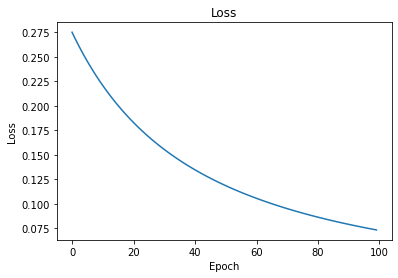

In [24]:
total_loss = train_network(network, datasets, num_outputs, learning_rate=0.4, num_epochs=100)
plot_network(total_loss)

## Predicting

In [25]:
def predict(network, features):
    outputs = forward_propagate(network, features)
    return outputs.index(max(outputs))

In [26]:
def calculate_accuracy(predictions, labels):
    
    score = 0.0
    for pred, label in zip(predictions, labels):
        if pred == label:
            score += 1.
            
    accuracy = (score/ len(labels)) * 100.
    return accuracy

In [27]:
predictions = []; labels = []
for features in datasets:
    prediction = predict(network, features)
    
    predictions.append(prediction)
    labels.append(features[-1])
    
accuracy = calculate_accuracy(predictions, labels)
print(f'Model Accuracy: {accuracy}%')

Model Accuracy: 100.0%
